# Adult census income

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn import preprocessing

In [263]:
pd.set_option('display.max_columns',500)

In [136]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [349]:
data1=pd.read_csv('adult.csv')
x=data1.drop('income',axis=1)
y=data1['income']

In [350]:
x,y = train_test_split(data1,random_state=7)

In [351]:
x.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
22659,23,?,281668,10th,6,Never-married,?,Own-child,Black,Female,0,0,40,United-States,<=50K
25090,62,Private,88055,Some-college,10,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,60,United-States,>50K
18617,49,Private,236586,HS-grad,9,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,>50K
8482,23,Private,244408,Some-college,10,Never-married,Adm-clerical,Other-relative,Asian-Pac-Islander,Female,0,0,24,Vietnam,<=50K
1544,57,Self-emp-inc,159028,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,60,United-States,>50K


In [352]:
x.groupby('income').size()

income
<=50K    18527
>50K      5893
dtype: int64

In [353]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24420 entries, 22659 to 28847
Data columns (total 15 columns):
age               24420 non-null int64
workclass         24420 non-null object
fnlwgt            24420 non-null int64
education         24420 non-null object
education.num     24420 non-null int64
marital.status    24420 non-null object
occupation        24420 non-null object
relationship      24420 non-null object
race              24420 non-null object
sex               24420 non-null object
capital.gain      24420 non-null int64
capital.loss      24420 non-null int64
hours.per.week    24420 non-null int64
native.country    24420 non-null object
income            24420 non-null object
dtypes: int64(6), object(9)
memory usage: 3.0+ MB


In [354]:
x.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,24420.000000,2.442000e+04,24420.000000,24420.000000,24420.000000,24420.000000
mean,38.544472,1.897778e+05,10.075594,1085.071826,87.617445,40.444554
std,13.652393,1.052738e+05,2.581728,7382.097050,403.782923,12.296446
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.179630e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781470e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370492e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [355]:
x.shape

(24420, 15)

In [356]:
(x=='?').sum()

age                  0
workclass         1374
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1380
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     445
income               0
dtype: int64

In [357]:
((x=='?').sum()*100/32561).round(2)

age               0.00
workclass         4.22
fnlwgt            0.00
education         0.00
education.num     0.00
marital.status    0.00
occupation        4.24
relationship      0.00
race              0.00
sex               0.00
capital.gain      0.00
capital.loss      0.00
hours.per.week    0.00
native.country    1.37
income            0.00
dtype: float64

In [358]:
((y=='?').sum()*100/32561).round(2)

age               0.00
workclass         1.42
fnlwgt            0.00
education         0.00
education.num     0.00
marital.status    0.00
occupation        1.42
relationship      0.00
race              0.00
sex               0.00
capital.gain      0.00
capital.loss      0.00
hours.per.week    0.00
native.country    0.42
income            0.00
dtype: float64

In [359]:
#data[data[::] != '?']
x = x[(x['workclass']!='?')& (x['occupation']!='?') & (x['native.country']!='?')]

In [360]:
#data[data[::] != '?']
y = y[(y['workclass']!='?')& (y['occupation']!='?') & (y['native.country']!='?')]

In [361]:
(x=='?').sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [362]:
(y=='?').sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [363]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22616 entries, 25090 to 28847
Data columns (total 15 columns):
age               22616 non-null int64
workclass         22616 non-null object
fnlwgt            22616 non-null int64
education         22616 non-null object
education.num     22616 non-null int64
marital.status    22616 non-null object
occupation        22616 non-null object
relationship      22616 non-null object
race              22616 non-null object
sex               22616 non-null object
capital.gain      22616 non-null int64
capital.loss      22616 non-null int64
hours.per.week    22616 non-null int64
native.country    22616 non-null object
income            22616 non-null object
dtypes: int64(6), object(9)
memory usage: 2.8+ MB


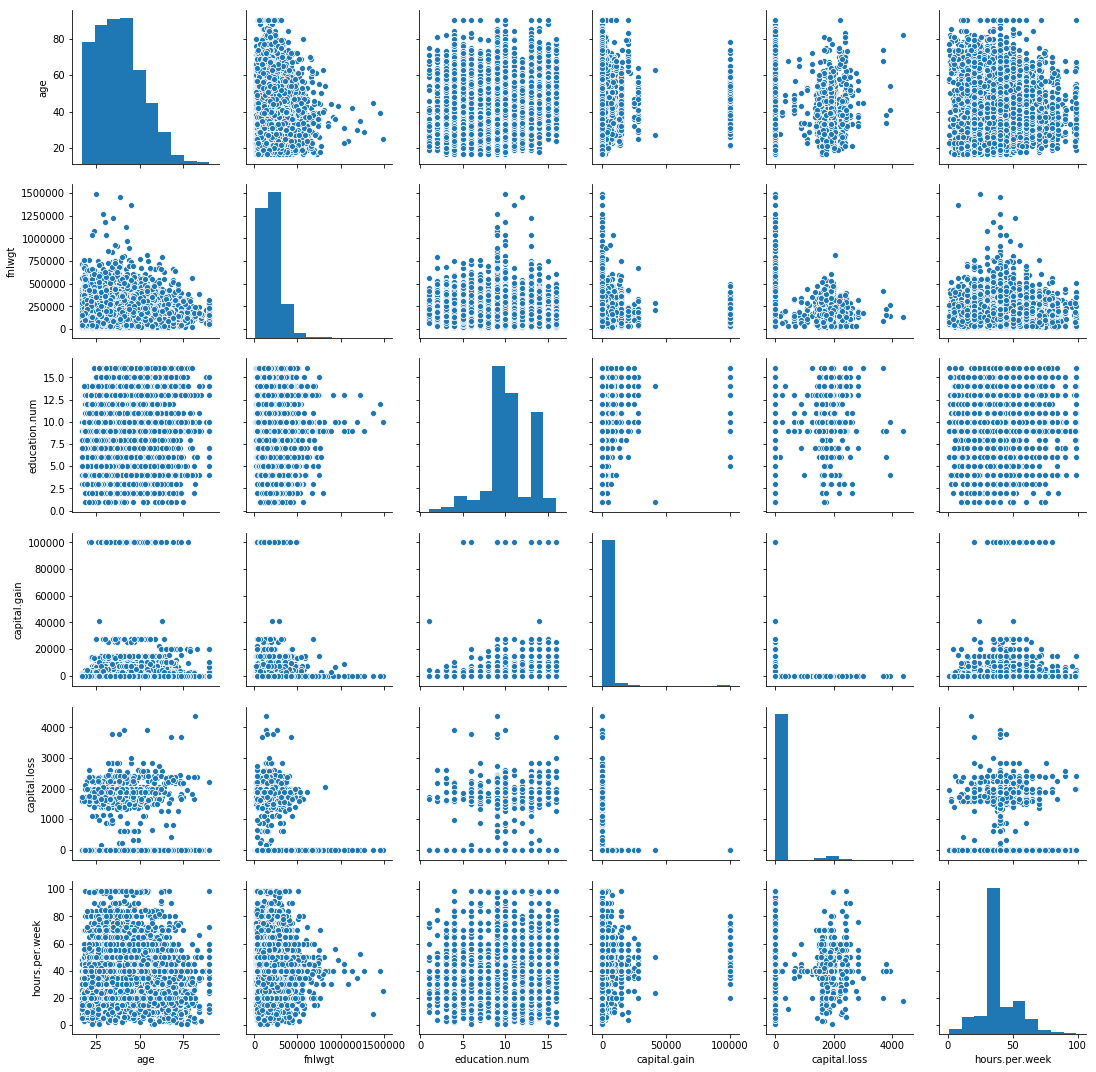

In [298]:
sns.pairplot(x)

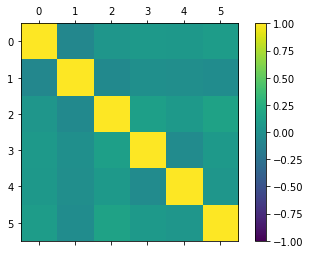

In [299]:
correlation = x.corr()
# plot correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlation, vmin=-1, vmax=1)
fig.colorbar(cax)
#sns.heatmap(x.select_dtypes([object]), annot=True, annot_kws={"size": 7})

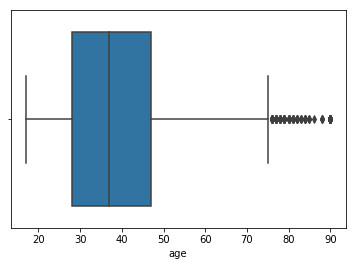

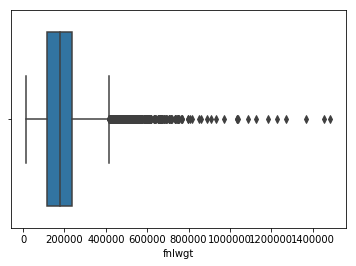

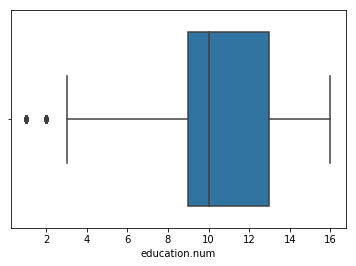

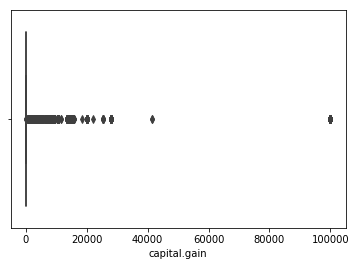

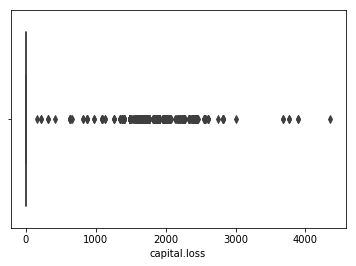

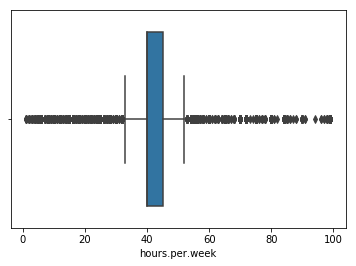

In [15]:

name = ['age','fnlwgt','education.num','capital.gain','capital.loss','hours.per.week']

for c in name:
    sns.boxplot(x=x[c],data=x)

    plt.show()


In [364]:
x.select_dtypes(['object']).head()

,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
25090,Private,Some-college,Married-civ-spouse,Adm-clerical,Husband,White,Male,United-States,>50K
18617,Private,HS-grad,Married-civ-spouse,Adm-clerical,Husband,White,Male,United-States,>50K
8482,Private,Some-college,Never-married,Adm-clerical,Other-relative,Asian-Pac-Islander,Female,Vietnam,<=50K
1544,Self-emp-inc,Prof-school,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,>50K
10515,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Wife,White,Female,Dominican-Republic,<=50K


In [365]:
x['income'].unique()

array(['>50K', '<=50K'], dtype=object)

In [366]:
x['workclass'].unique()

array(['Private', 'Self-emp-inc', 'Local-gov', 'State-gov',
       'Self-emp-not-inc', 'Federal-gov', 'Without-pay'], dtype=object)

In [367]:
x['education'].unique()

array(['Some-college', 'HS-grad', 'Prof-school', 'Bachelors', '7th-8th',
       'Assoc-voc', '9th', '1st-4th', 'Masters', '11th', 'Doctorate',
       'Assoc-acdm', '5th-6th', '10th', '12th', 'Preschool'], dtype=object)

In [368]:
x['occupation'].unique()

array(['Adm-clerical', 'Prof-specialty', 'Machine-op-inspct',
       'Protective-serv', 'Transport-moving', 'Sales',
       'Handlers-cleaners', 'Craft-repair', 'Other-service',
       'Exec-managerial', 'Farming-fishing', 'Tech-support',
       'Priv-house-serv', 'Armed-Forces'], dtype=object)

In [369]:
x['sex'].unique()

array(['Male', 'Female'], dtype=object)

In [370]:
x['workclass'].unique()

array(['Private', 'Self-emp-inc', 'Local-gov', 'State-gov',
       'Self-emp-not-inc', 'Federal-gov', 'Without-pay'], dtype=object)

In [371]:
x['native.country'].unique()

array(['United-States', 'Vietnam', 'Dominican-Republic', 'Guatemala',
       'Germany', 'Italy', 'Mexico', 'Canada', 'El-Salvador', 'Nicaragua',
       'Portugal', 'Puerto-Rico', 'Trinadad&Tobago', 'France', 'Jamaica',
       'Japan', 'Thailand', 'Haiti', 'Cambodia', 'India', 'England',
       'Peru', 'China', 'Philippines', 'South', 'Cuba', 'Columbia',
       'Ecuador', 'Hungary', 'Poland', 'Laos', 'Taiwan', 'Iran',
       'Ireland', 'Greece', 'Yugoslavia', 'Honduras', 'Scotland',
       'Outlying-US(Guam-USVI-etc)', 'Hong', 'Holand-Netherlands'],
      dtype=object)

In [372]:
y['native.country'].unique()

array(['United-States', 'Ireland', 'Vietnam', 'Jamaica', 'England',
       'Dominican-Republic', 'Japan', 'Germany', 'Trinadad&Tobago',
       'Poland', 'Mexico', 'Haiti', 'Nicaragua', 'Hong', 'Cuba', 'China',
       'Columbia', 'Philippines', 'Canada', 'South', 'India',
       'El-Salvador', 'Cambodia', 'Guatemala', 'Italy', 'Iran',
       'Puerto-Rico', 'Greece', 'Outlying-US(Guam-USVI-etc)', 'Ecuador',
       'Thailand', 'Portugal', 'Yugoslavia', 'Laos', 'Peru', 'Taiwan',
       'Scotland', 'France', 'Hungary', 'Honduras'], dtype=object)

In [373]:
y.replace(['South','Hong'],['South korea','Hong kong'],inplace=True)

In [374]:
x.replace(['South','Hong'],['South korea','Hong kong'],inplace=True)

In [375]:
x['native.country'].unique()

array(['United-States', 'Vietnam', 'Dominican-Republic', 'Guatemala',
       'Germany', 'Italy', 'Mexico', 'Canada', 'El-Salvador', 'Nicaragua',
       'Portugal', 'Puerto-Rico', 'Trinadad&Tobago', 'France', 'Jamaica',
       'Japan', 'Thailand', 'Haiti', 'Cambodia', 'India', 'England',
       'Peru', 'China', 'Philippines', 'South korea', 'Cuba', 'Columbia',
       'Ecuador', 'Hungary', 'Poland', 'Laos', 'Taiwan', 'Iran',
       'Ireland', 'Greece', 'Yugoslavia', 'Honduras', 'Scotland',
       'Outlying-US(Guam-USVI-etc)', 'Hong kong', 'Holand-Netherlands'],
      dtype=object)

In [376]:
x['net_capital']=x['capital.gain']-x['capital.loss']
x.drop(['capital.gain','capital.loss'],1,inplace=True)

In [377]:
y['net_capital']=y['capital.gain']-y['capital.loss']
y.drop(['capital.gain','capital.loss'],1,inplace=True)

In [378]:
y.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,hours.per.week,native.country,income,net_capital
18329,68,Private,121846,7th-8th,4,Widowed,Other-service,Unmarried,Amer-Indian-Eskimo,Female,20,United-States,<=50K,0
997,24,Private,85088,HS-grad,9,Never-married,Sales,Own-child,White,Female,32,United-States,<=50K,-1762
13225,50,Private,149770,Masters,14,Never-married,Prof-specialty,Unmarried,White,Female,40,United-States,<=50K,0
6837,40,State-gov,184378,Bachelors,13,Married-civ-spouse,Adm-clerical,Husband,White,Male,40,United-States,<=50K,0
29132,29,Private,151382,Assoc-voc,11,Divorced,Handlers-cleaners,Unmarried,White,Male,50,United-States,<=50K,0


In [379]:
x.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,hours.per.week,native.country,income,net_capital
25090,62,Private,88055,Some-college,10,Married-civ-spouse,Adm-clerical,Husband,White,Male,60,United-States,>50K,0
18617,49,Private,236586,HS-grad,9,Married-civ-spouse,Adm-clerical,Husband,White,Male,40,United-States,>50K,0
8482,23,Private,244408,Some-college,10,Never-married,Adm-clerical,Other-relative,Asian-Pac-Islander,Female,24,Vietnam,<=50K,0
1544,57,Self-emp-inc,159028,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,60,United-States,>50K,99999
10515,27,Private,135520,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Wife,White,Female,40,Dominican-Republic,<=50K,0


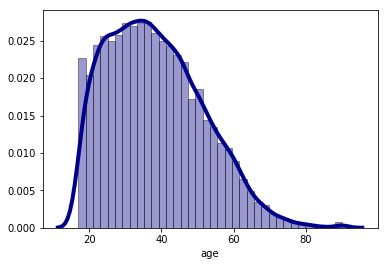

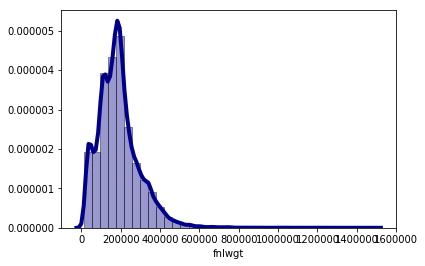

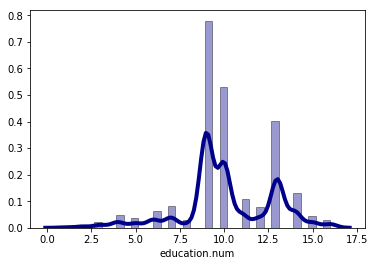

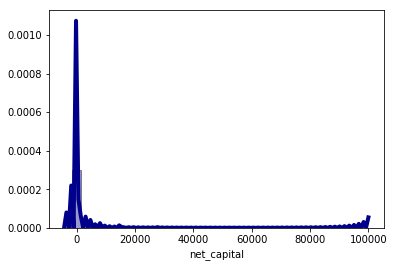

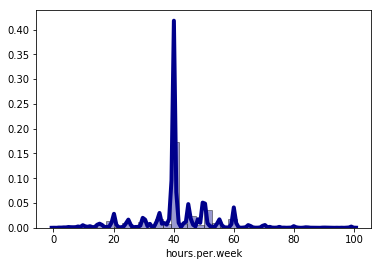

In [27]:

name = ['age','fnlwgt','education.num','net_capital','hours.per.week']
for c in name:
    sns.distplot(x[c], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
    plt.show()

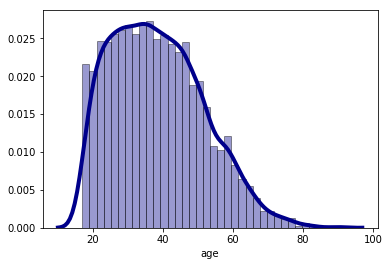

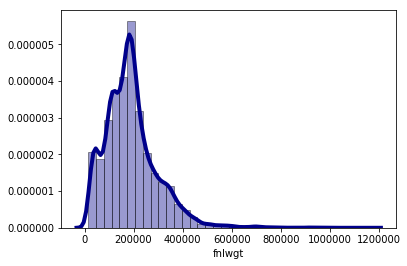

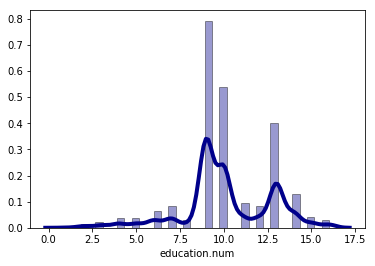

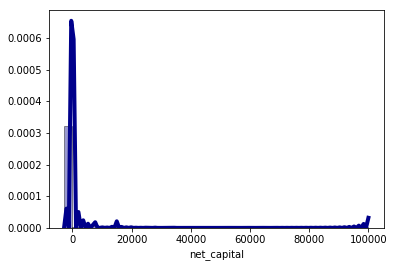

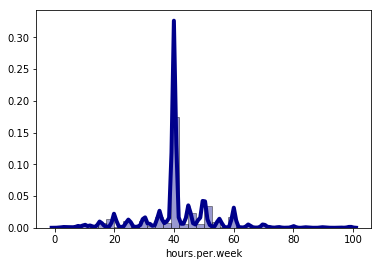

In [70]:

name = ['age','fnlwgt','education.num','net_capital','hours.per.week']
for c in name:
    sns.distplot(y[c], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
    plt.show()

In [380]:
d = x.loc[:,['age','fnlwgt','education.num','net_capital','hours.per.week']]

In [381]:
d1 = y.loc[:,['age','fnlwgt','education.num','net_capital','hours.per.week']]

In [382]:
d.head()

,age,fnlwgt,education.num,net_capital,hours.per.week
25090,62,88055,10,0,60
18617,49,236586,9,0,40
8482,23,244408,10,0,24
1544,57,159028,15,99999,60
10515,27,135520,9,0,40


In [383]:
d1.head()

,age,fnlwgt,education.num,net_capital,hours.per.week
18329,68,121846,4,0,20
997,24,85088,9,-1762,32
13225,50,149770,14,0,40
6837,40,184378,13,0,40
29132,29,151382,11,0,50


In [384]:
from sklearn.preprocessing import Normalizer

In [385]:
pt = preprocessing.QuantileTransformer(output_distribution='normal')
d=pd.DataFrame(pt.fit_transform(d),columns=['age','fnlwgt','education.num','net_capital','hours.per.week'])


In [386]:
pt = preprocessing.QuantileTransformer(output_distribution='normal')
d1=pd.DataFrame(pt.fit_transform(d1),columns=['age','fnlwgt','education.num','net_capital','hours.per.week'])


In [387]:

d=pd.DataFrame(Normalizer().fit_transform(d),columns=['age','fnlwgt','education.num','net_capital','hours.per.week'])


In [388]:

d1=pd.DataFrame(Normalizer().fit_transform(d1),columns=['age','fnlwgt','education.num','net_capital','hours.per.week'])


In [389]:
pt = preprocessing.QuantileTransformer(output_distribution='normal')
d=pd.DataFrame(pt.fit_transform(d),columns=['age','fnlwgt','education.num','net_capital','hours.per.week'])


In [390]:
pt = preprocessing.QuantileTransformer(output_distribution='normal')
d1=pd.DataFrame(pt.fit_transform(d1),columns=['age','fnlwgt','education.num','net_capital','hours.per.week'])


quantile
normalizer
quantile

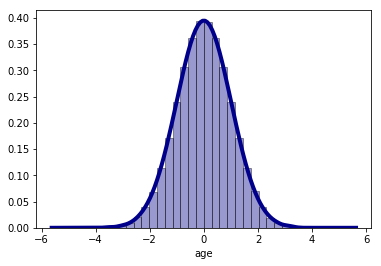

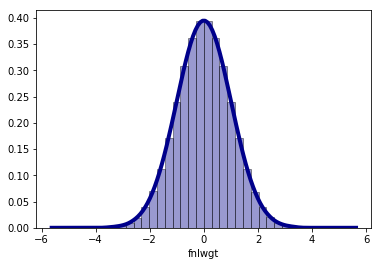

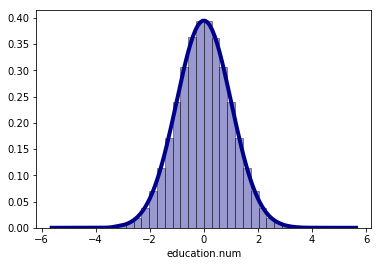

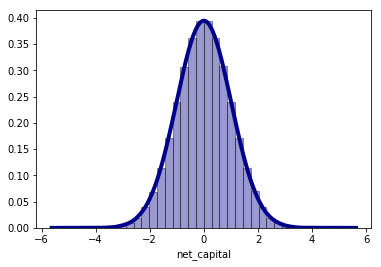

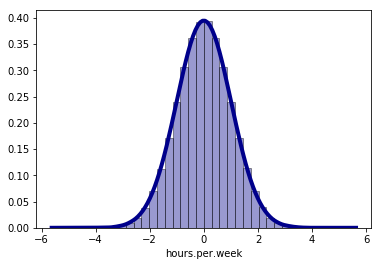

In [36]:
name = ['age','fnlwgt','education.num','net_capital','hours.per.week']

for c in name:
    sns.distplot(d[c], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
    plt.show()

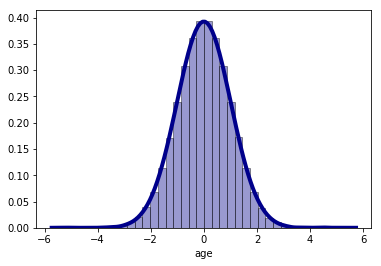

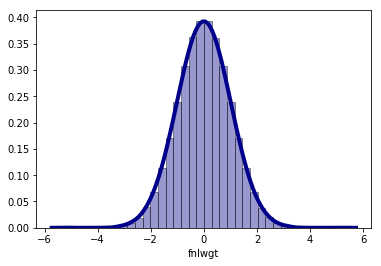

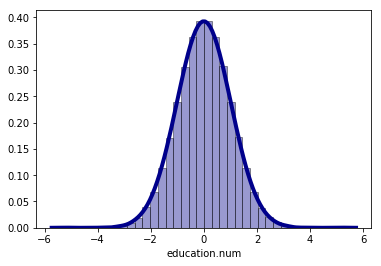

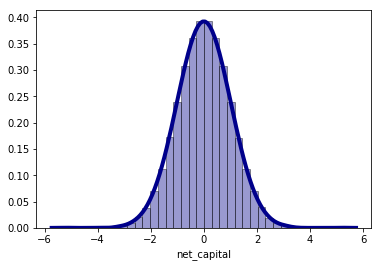

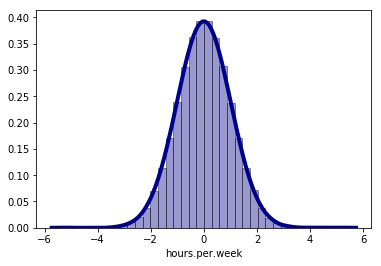

In [76]:
name = ['age','fnlwgt','education.num','net_capital','hours.per.week']

for c in name:
    sns.distplot(d1[c], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
    plt.show()

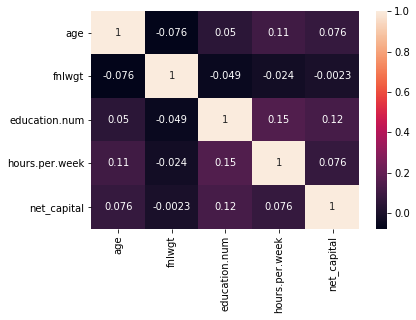

In [37]:
sns.heatmap(x.corr(),annot = True)

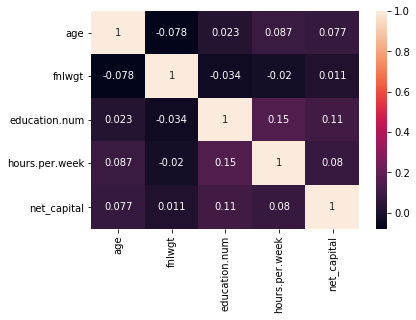

In [77]:
sns.heatmap(y.corr(),annot = True)

In [327]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for c in x.select_dtypes(['object']).columns:
    
        x[c]=le.fit_transform(x[c])
        

In [328]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for c in y.select_dtypes(['object']).columns:
    
        y[c]=le.fit_transform(y[c])
        

In [391]:
d.head()

,age,fnlwgt,education.num,net_capital,hours.per.week
0,1.271463,-0.739838,-0.047066,0.752711,1.181167
1,1.289112,1.000788,-0.922305,-0.782335,-0.353895
2,-1.011512,0.644963,0.081078,0.199642,-1.585738
3,0.382938,-0.071988,0.582017,2.297585,0.569767
4,-1.324764,-0.797134,-1.036632,-0.941569,-0.437796


In [392]:
d1.head()

,age,fnlwgt,education.num,net_capital,hours.per.week
0,1.193302,-0.326974,-1.162963,1.177756,-0.980303
1,-0.630795,-0.711829,-0.211837,-1.836541,-0.869183
2,0.811588,-0.329244,1.826881,0.062370,0.089717
3,0.310771,0.142590,2.563134,-1.049572,-0.485294
4,-0.742069,-0.433897,0.654888,-0.615244,1.564571


In [393]:
x.drop(['age','fnlwgt','education.num','net_capital','hours.per.week'],1,inplace=True)

In [394]:
y.drop(['age','fnlwgt','education.num','net_capital','hours.per.week'],1,inplace=True)

In [395]:
x=pd.merge(x,d,left_index=True,right_index=True)

In [396]:
y=pd.merge(y,d,left_index=True,right_index=True)

In [397]:
x.head()

,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income,age,fnlwgt,education.num,net_capital,hours.per.week
18617,Private,HS-grad,Married-civ-spouse,Adm-clerical,Husband,White,Male,United-States,>50K,0.246766,0.256221,1.044112,1.715193,0.687815
8482,Private,Some-college,Never-married,Adm-clerical,Other-relative,Asian-Pac-Islander,Female,Vietnam,<=50K,-0.323472,0.665897,0.032191,0.389770,-2.446477
1544,Self-emp-inc,Prof-school,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,>50K,-0.563354,0.042055,-0.878535,-0.711687,1.722249
10515,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Wife,White,Female,Dominican-Republic,<=50K,0.420402,0.534485,1.711687,0.686374,0.757328
1589,Private,Bachelors,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,>50K,0.135976,2.316435,-0.042222,0.727977,-0.801087


In [398]:
x.shape

(15707, 14)

In [399]:
y.head()

,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income,age,fnlwgt,education.num,net_capital,hours.per.week
18329,Private,7th-8th,Widowed,Other-service,Unmarried,Amer-Indian-Eskimo,Female,United-States,<=50K,-1.271895,0.846448,0.941191,-1.079292,-0.508237
997,Private,HS-grad,Never-married,Sales,Own-child,White,Female,United-States,<=50K,0.138311,2.330581,-0.112301,1.127960,0.613139
13225,Private,Masters,Never-married,Prof-specialty,Unmarried,White,Female,United-States,<=50K,-1.878093,-0.192533,-0.235910,1.350433,-0.893649
6837,State-gov,Bachelors,Married-civ-spouse,Adm-clerical,Husband,White,Male,United-States,<=50K,2.233151,0.222281,-0.628945,-0.264062,-0.094749
18728,Private,HS-grad,Never-married,Machine-op-inspct,Not-in-family,White,Male,United-States,<=50K,-1.457741,0.900489,-0.747872,-0.494212,-0.207041


In [400]:
#pca
#treebaseapproach
#rfe

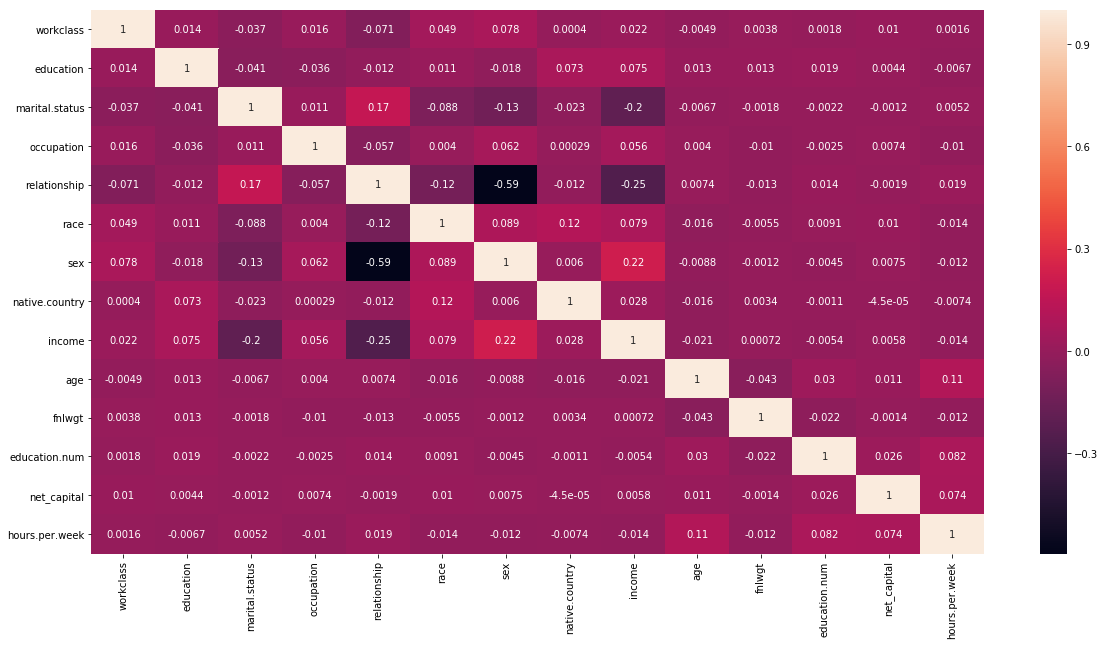

In [47]:
plt.figure(figsize=(20,10))
sns.heatmap(x.corr(),annot = True)

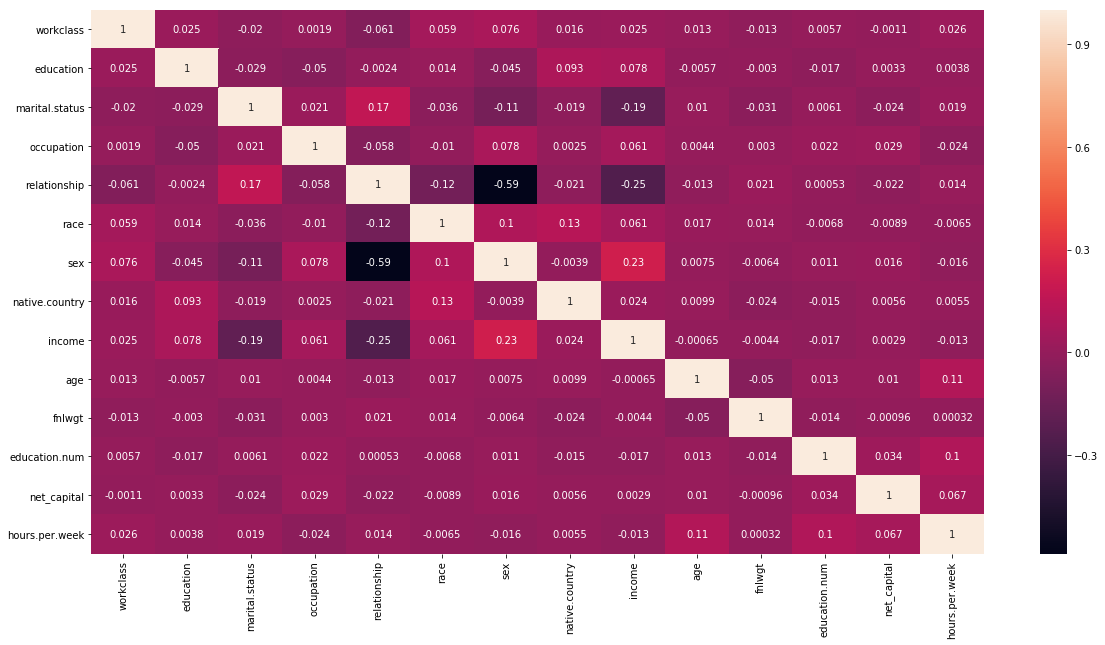

In [83]:
plt.figure(figsize=(20,10))
sns.heatmap(y.corr(),annot = True)

In [339]:
x_train = x.drop('income',1)
y_train = x['income']

In [340]:
x_test = x.drop('income',1)
y_test = x['income']

In [341]:
from sklearn.feature_selection import RFECV

In [342]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb

In [343]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [344]:
import warnings
warnings.filterwarnings('ignore')

Number of features selected: 7
Test Accuracy 1.0
[[11434     0]
 [    0  4273]]


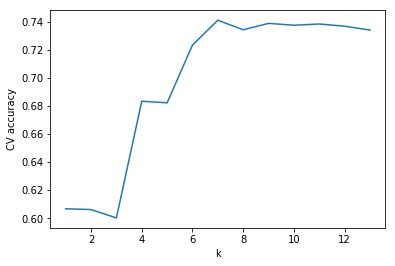

In [345]:
rfe = RFECV(estimator = DecisionTreeClassifier(random_state=1) , cv=4, scoring = 'accuracy')
rfe = rfe.fit(x_train,y_train)

col = x_train.columns[rfe.support_]

acc = accuracy_score(y_test,rfe.estimator_.predict(x_test[col]))

print('Number of features selected: {}'.format(rfe.n_features_))
print('Test Accuracy {}'.format(acc))
print(confusion_matrix(y_test,rfe.estimator_.predict(x_test[col])))


plt.figure()
plt.xlabel('k')
plt.ylabel('CV accuracy')
plt.plot(np.arange(1, rfe.grid_scores_.size+1), rfe.grid_scores_)
plt.show()

Number of features selected: 10
Test Accuracy 0.9850385178582798
[[11414    20]
 [  215  4058]]


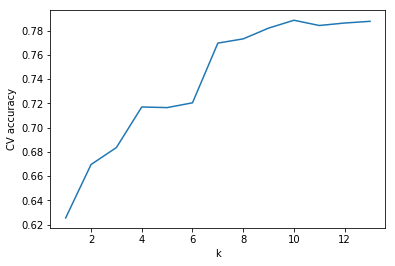

In [137]:
rfe = RFECV(estimator = RandomForestClassifier(random_state=1) , cv=4, scoring = 'accuracy')
rfe = rfe.fit(x_train,y_train)

col = x_train.columns[rfe.support_]

acc = accuracy_score(y_test,rfe.estimator_.predict(x_test[col]))

print('Number of features selected: {}'.format(rfe.n_features_))
print('Test Accuracy {}'.format(acc))
print(confusion_matrix(y_test,rfe.estimator_.predict(x_test[col])))

plt.figure()
plt.xlabel('k')
plt.ylabel('CV accuracy')
plt.plot(np.arange(1, rfe.grid_scores_.size+1), rfe.grid_scores_)
plt.show()

Number of features selected: 12
Test Accuracy 0.8111033297256001
[[10383  1051]
 [ 1916  2357]]


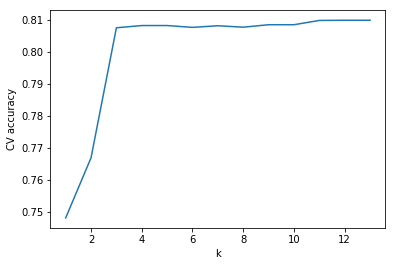

In [140]:
rfe = RFECV(estimator = AdaBoostClassifier(random_state=1) , cv=4, scoring = 'accuracy')
rfe = rfe.fit(x_train,y_train)

col = x_train.columns[rfe.support_]

acc = accuracy_score(y_test,rfe.estimator_.predict(x_test[col]))

print('Number of features selected: {}'.format(rfe.n_features_))
print('Test Accuracy {}'.format(acc))
print(confusion_matrix(y_test,rfe.estimator_.predict(x_test[col])))

plt.figure()
plt.xlabel('k')
plt.ylabel('CV accuracy')
plt.plot(np.arange(1, rfe.grid_scores_.size+1), rfe.grid_scores_)
plt.show()

Number of features selected: 11
Test Accuracy 0.8190615649073661
[[10545   889]
 [ 1953  2320]]


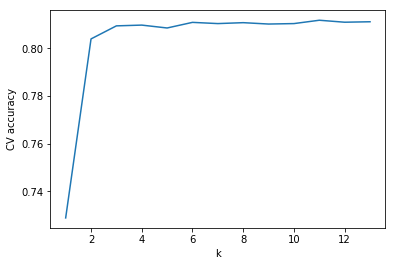

In [141]:
rfe = RFECV(estimator = GradientBoostingClassifier(random_state=1) , cv=4, scoring = 'accuracy')
rfe = rfe.fit(x_train,y_train)

col = x_train.columns[rfe.support_]

acc = accuracy_score(y_test,rfe.estimator_.predict(x_test[col]))

print('Number of features selected: {}'.format(rfe.n_features_))
print('Test Accuracy {}'.format(acc))
print(confusion_matrix(y_test,rfe.estimator_.predict(x_test[col])))

plt.figure()
plt.xlabel('k')
plt.ylabel('CV accuracy')
plt.plot(np.arange(1, rfe.grid_scores_.size+1), rfe.grid_scores_)
plt.show()

In [174]:
from sklearn.ensemble import RandomForestClassifier
 
# Feature importance values from Random Forests
rf = RandomForestClassifier(n_jobs=-1, random_state=1)
rf.fit(x_train, y_train)
feat_imp = rf.feature_importances_

cols = x_train.columns[feat_imp >= 0.01]
est_imp = RandomForestClassifier(random_state=1)
est_imp.fit(x_train[cols], y_train)
 
# Test accuracy
acc = accuracy_score(y_test, est_imp.predict(x_test[cols]))
print('Number of features selected: {}'.format(len(cols)))
print('Test Accuracy {}'.format(acc))
print(confusion_matrix(y_test,est_imp.predict(x_test[cols])))

Number of features selected: 13
Test Accuracy 0.9854205131470045
[[11410    24]
 [  205  4068]]


In [173]:


rf = AdaBoostClassifier( random_state=1)
rf.fit(x_train, y_train)
feat_imp = rf.feature_importances_

cols = x_train.columns[feat_imp >= 0.01]
est_imp = AdaBoostClassifier( random_state=1)
est_imp.fit(x_train[cols], y_train)
 
# Test accuracy
acc = accuracy_score(y_test, est_imp.predict(x_test[cols]))
print('Number of features selected: {}'.format(len(cols)))
print('Test Accuracy {}'.format(acc))
print(confusion_matrix(y_test,est_imp.predict(x_test[cols])))

Number of features selected: 11
Test Accuracy 0.8111033297256001
[[10383  1051]
 [ 1916  2357]]


In [176]:
rf = GradientBoostingClassifier( random_state=1)
rf.fit(x_train, y_train)
feat_imp = rf.feature_importances_

cols = x_train.columns[feat_imp >= 0.01]
est_imp = GradientBoostingClassifier( random_state=1)
est_imp.fit(x_train[cols], y_train)
 
# Test accuracy
acc = accuracy_score(y_test, est_imp.predict(x_test[cols]))
print('Number of features selected: {}'.format(len(cols)))
print('Test Accuracy {}'.format(acc))
print(confusion_matrix(y_test,est_imp.predict(x_test[cols])))

Number of features selected: 5
Test Accuracy 0.8166422614121093
[[10491   943]
 [ 1937  2336]]


In [184]:
rf = xgb.XGBClassifier(random_state=1)
rf.fit(x_train, y_train)
feat_imp = rf.feature_importances_

cols = x_train.columns[feat_imp >= 0.01]
est_imp = xgb.XGBClassifier(random_state=1)
est_imp.fit(x_train[cols], y_train)
 
# Test accuracy
acc = accuracy_score(y_test, est_imp.predict(x_test[cols]))
print('Number of features selected: {}'.format(len(cols)))
print('Test Accuracy {}'.format(acc))
print(confusion_matrix(y_test,est_imp.predict(x_test[cols])))

Number of features selected: 13
Test Accuracy 0.8190615649073661
[[10560   874]
 [ 1968  2305]]


# one hot

In [401]:
x['income']=le.fit_transform(x['income'])

In [402]:
x.head()

,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income,age,fnlwgt,education.num,net_capital,hours.per.week
18617,Private,HS-grad,Married-civ-spouse,Adm-clerical,Husband,White,Male,United-States,1,0.246766,0.256221,1.044112,1.715193,0.687815
8482,Private,Some-college,Never-married,Adm-clerical,Other-relative,Asian-Pac-Islander,Female,Vietnam,0,-0.323472,0.665897,0.032191,0.389770,-2.446477
1544,Self-emp-inc,Prof-school,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,1,-0.563354,0.042055,-0.878535,-0.711687,1.722249
10515,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Wife,White,Female,Dominican-Republic,0,0.420402,0.534485,1.711687,0.686374,0.757328
1589,Private,Bachelors,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,1,0.135976,2.316435,-0.042222,0.727977,-0.801087


In [403]:
for c in x.select_dtypes(['object']).columns:
    cont = pd.get_dummies(x[c],prefix='Contract')
    x = pd.concat([x,cont],axis=1)
    x.drop(c,1,inplace=True)
    

In [404]:
for c in y.select_dtypes(['object']).columns:
    cont = pd.get_dummies(y[c],prefix='Contract')
    y = pd.concat([y,cont],axis=1)
    y.drop(c,1,inplace=True)
    

In [405]:
x.head()

,income,age,fnlwgt,education.num,net_capital,hours.per.week,Contract_Local-gov,Contract_Private,Contract_Self-emp-inc,Contract_Self-emp-not-inc,Contract_State-gov,Contract_Without-pay,Contract_11th,Contract_12th,Contract_1st-4th,Contract_5th-6th,Contract_7th-8th,Contract_9th,Contract_Assoc-acdm,Contract_Assoc-voc,Contract_Bachelors,Contract_Doctorate,Contract_HS-grad,Contract_Masters,Contract_Preschool,Contract_Prof-school,Contract_Some-college,Contract_Married-AF-spouse,Contract_Married-civ-spouse,Contract_Married-spouse-absent,Contract_Never-married,Contract_Separated,Contract_Widowed,Contract_Armed-Forces,Contract_Craft-repair,Contract_Exec-managerial,Contract_Farming-fishing,Contract_Handlers-cleaners,Contract_Machine-op-inspct,Contract_Other-service,Contract_Priv-house-serv,Contract_Prof-specialty,Contract_Protective-serv,Contract_Sales,Contract_Tech-support,Contract_Transport-moving,Contract_Not-in-family,Contract_Other-relative,Contract_Own-child,Contract_Unmarried,Contract_Wife,Contract_Asian-Pac-Islander,Contract_Black,Contract_Other,Contract_White,Contract_Male,Contract_Canada,Contract_China,Contract_Columbia,Contract_Cuba,Contract_Dominican-Republic,Contract_Ecuador,Contract_El-Salvador,Contract_England,Contract_France,Contract_Germany,Contract_Greece,Contract_Guatemala,Contract_Haiti,Contract_Holand-Netherlands,Contract_Honduras,Contract_Hong kong,Contract_Hungary,Contract_India,Contract_Iran,Contract_Ireland,Contract_Italy,Contract_Jamaica,Contract_Japan,Contract_Laos,Contract_Mexico,Contract_Nicaragua,Contract_Outlying-US(Guam-USVI-etc),Contract_Peru,Contract_Philippines,Contract_Poland,Contract_Portugal,Contract_Puerto-Rico,Contract_Scotland,Contract_South korea,Contract_Taiwan,Contract_Thailand,Contract_Trinadad&Tobago,Contract_United-States,Contract_Vietnam,Contract_Yugoslavia
18617,1,0.246766,0.256221,1.044112,1.715193,0.687815,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
8482,0,-0.323472,0.665897,0.032191,0.389770,-2.446477,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1544,1,-0.563354,0.042055,-0.878535,-0.711687,1.722249,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
10515,0,0.420402,0.534485,1.711687,0.686374,0.757328,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1589,1,0.135976,2.316435,-0.042222,0.727977,-0.801087,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [406]:
x.shape

(15707, 96)

In [407]:
x_train = x.drop('income',1)
y_train = x['income']

In [408]:
x_test = x.drop('income',1)
y_test = x['income']

Number of features selected: 94
Test Accuracy 1.0
[[11434     0]
 [    0  4273]]


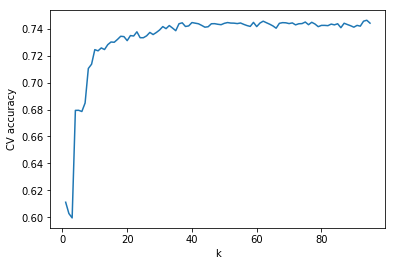

In [409]:
rfe = RFECV(estimator = DecisionTreeClassifier(random_state=1) , cv=4, scoring = 'accuracy')
rfe = rfe.fit(x_train,y_train)

col = x_train.columns[rfe.support_]

acc = accuracy_score(y_test,rfe.estimator_.predict(x_test[col]))

print('Number of features selected: {}'.format(rfe.n_features_))
print('Test Accuracy {}'.format(acc))
print(confusion_matrix(y_test,rfe.estimator_.predict(x_test[col])))


plt.figure()
plt.xlabel('k')
plt.ylabel('CV accuracy')
plt.plot(np.arange(1, rfe.grid_scores_.size+1), rfe.grid_scores_)
plt.show()

Number of features selected: 62
Test Accuracy 0.9844655249251926
[[11404    30]
 [  214  4059]]


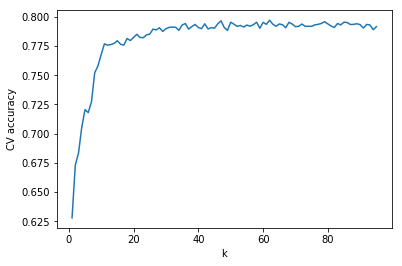

In [410]:
rfe = RFECV(estimator = RandomForestClassifier(random_state=1) , cv=4, scoring = 'accuracy')
rfe = rfe.fit(x_train,y_train)

col = x_train.columns[rfe.support_]

acc = accuracy_score(y_test,rfe.estimator_.predict(x_test[col]))

print('Number of features selected: {}'.format(rfe.n_features_))
print('Test Accuracy {}'.format(acc))
print(confusion_matrix(y_test,rfe.estimator_.predict(x_test[col])))

plt.figure()
plt.xlabel('k')
plt.ylabel('CV accuracy')
plt.plot(np.arange(1, rfe.grid_scores_.size+1), rfe.grid_scores_)
plt.show()

Number of features selected: 38
Test Accuracy 0.8136499649837652
[[10411  1023]
 [ 1904  2369]]


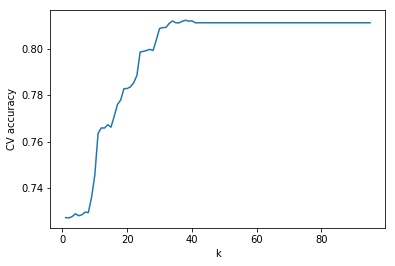

In [411]:
rfe = RFECV(estimator = AdaBoostClassifier(random_state=1) , cv=4, scoring = 'accuracy')
rfe = rfe.fit(x_train,y_train)

col = x_train.columns[rfe.support_]

acc = accuracy_score(y_test,rfe.estimator_.predict(x_test[col]))

print('Number of features selected: {}'.format(rfe.n_features_))
print('Test Accuracy {}'.format(acc))
print(confusion_matrix(y_test,rfe.estimator_.predict(x_test[col])))

plt.figure()
plt.xlabel('k')
plt.ylabel('CV accuracy')
plt.plot(np.arange(1, rfe.grid_scores_.size+1), rfe.grid_scores_)
plt.show()

Number of features selected: 45
Test Accuracy 0.8211625389953524
[[10530   904]
 [ 1905  2368]]


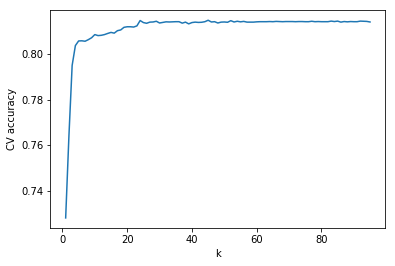

In [412]:
rfe = RFECV(estimator = GradientBoostingClassifier(random_state=1) , cv=4, scoring = 'accuracy')
rfe = rfe.fit(x_train,y_train)

col = x_train.columns[rfe.support_]

acc = accuracy_score(y_test,rfe.estimator_.predict(x_test[col]))

print('Number of features selected: {}'.format(rfe.n_features_))
print('Test Accuracy {}'.format(acc))
print(confusion_matrix(y_test,rfe.estimator_.predict(x_test[col])))

plt.figure()
plt.xlabel('k')
plt.ylabel('CV accuracy')
plt.plot(np.arange(1, rfe.grid_scores_.size+1), rfe.grid_scores_)
plt.show()

In [413]:
from sklearn.ensemble import RandomForestClassifier
 
# Feature importance values from Random Forests
rf = RandomForestClassifier(n_jobs=-1, random_state=1)
rf.fit(x_train, y_train)
feat_imp = rf.feature_importances_

cols = x_train.columns[feat_imp >= 0.01]
est_imp = RandomForestClassifier(random_state=1)
est_imp.fit(x_train[cols], y_train)
 
# Test accuracy
acc = accuracy_score(y_test, est_imp.predict(x_test[cols]))
print('Number of features selected: {}'.format(len(cols)))
print('Test Accuracy {}'.format(acc))
print(confusion_matrix(y_test,est_imp.predict(x_test[cols])))

Number of features selected: 19
Test Accuracy 0.9820462214299357
[[11397    37]
 [  245  4028]]


In [414]:


rf = AdaBoostClassifier( random_state=1)
rf.fit(x_train, y_train)
feat_imp = rf.feature_importances_

cols = x_train.columns[feat_imp >= 0.01]
est_imp = AdaBoostClassifier( random_state=1)
est_imp.fit(x_train[cols], y_train)
 
# Test accuracy
acc = accuracy_score(y_test, est_imp.predict(x_test[cols]))
print('Number of features selected: {}'.format(len(cols)))
print('Test Accuracy {}'.format(acc))
print(confusion_matrix(y_test,est_imp.predict(x_test[cols])))

Number of features selected: 39
Test Accuracy 0.8122493155917744
[[10412  1022]
 [ 1927  2346]]


In [415]:
rf = GradientBoostingClassifier( random_state=1)
rf.fit(x_train, y_train)
feat_imp = rf.feature_importances_

cols = x_train.columns[feat_imp >= 0.01]
est_imp = GradientBoostingClassifier( random_state=1)
est_imp.fit(x_train[cols], y_train)
 
# Test accuracy
acc = accuracy_score(y_test, est_imp.predict(x_test[cols]))
print('Number of features selected: {}'.format(len(cols)))
print('Test Accuracy {}'.format(acc))
print(confusion_matrix(y_test,est_imp.predict(x_test[cols])))

Number of features selected: 10
Test Accuracy 0.8113579932514166
[[10342  1092]
 [ 1871  2402]]


In [416]:
rf = xgb.XGBClassifier(random_state=1)
rf.fit(x_train, y_train)
feat_imp = rf.feature_importances_

cols = x_train.columns[feat_imp >= 0.01]
est_imp = xgb.XGBClassifier(random_state=1)
est_imp.fit(x_train[cols], y_train)
 
# Test accuracy
acc = accuracy_score(y_test, est_imp.predict(x_test[cols]))
print('Number of features selected: {}'.format(len(cols)))
print('Test Accuracy {}'.format(acc))
print(confusion_matrix(y_test,est_imp.predict(x_test[cols])))

Number of features selected: 25
Test Accuracy 0.8146049532055771
[[10380  1054]
 [ 1858  2415]]
